## Setup and Load Data

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load all experiment results
results_dir = Path("results")

def load_results(filename):
    with open(results_dir / filename, 'r') as f:
        data = json.load(f)
    
    server_metrics = data['evaluate_metrics_serverapp']
    rounds = sorted([int(k) for k in server_metrics.keys()])
    
    result = {
        'accuracy': [server_metrics[str(r)]['accuracy'] for r in rounds],
        'f1_score': [server_metrics[str(r)]['f1'] for r in rounds],
        'kappa': [server_metrics[str(r)]['kappa'] for r in rounds],
        'roc_auc': [server_metrics[str(r)]['roc'] for r in rounds]
    }
    return result

# Load all results
results = {}

# FedAvg results
results['fedavg_iid_0'] = load_results('metrics_FedAvg_iid_0attackers.json')
results = {}

results['fedavg_iid_0'] = load_results('metrics_FedAvg_iid_0attackers.json')
results['fedavg_iid_1'] = load_results('metrics_FedAvg_iid_1attackers.json')
results['fedavg_iid_2'] = load_results('metrics_FedAvg_iid_2attackers.json')
results['fedavg_noniid_0'] = load_results('metrics_FedAvg_non_iid_0attackers.json')
results['fedavg_noniid_1'] = load_results('metrics_FedAvg_non_iid_1attackers.json')
results['fedavg_noniid_2'] = load_results('metrics_FedAvg_non_iid_2attackers.json')

results['fedprox_iid_0'] = load_results('metrics_FedProx_iid_0attackers.json')
results['fedprox_iid_1'] = load_results('metrics_FedProx_iid_1attackers.json')
results['fedprox_iid_2'] = load_results('metrics_FedProx_iid_2attackers.json')
results['fedprox_noniid_0'] = load_results('metrics_FedProx_non_iid_0attackers.json')
results['fedprox_noniid_1'] = load_results('metrics_FedProx_non_iid_1attackers.json')
results['fedprox_noniid_2'] = load_results('metrics_FedProx_non_iid_2attackers.json')

results['defense_iid_0'] = load_results('metrics_FedAvgDefense_iid_0attackers.json')
results['defense_iid_1'] = load_results('metrics_FedAvgDefense_iid_1attackers.json')
results['defense_iid_2'] = load_results('metrics_FedAvgDefense_iid_2attackers.json')
results['defense_noniid_0'] = load_results('metrics_FedAvgDefense_non_iid_0attackers.json')
results['defense_noniid_1'] = load_results('metrics_FedAvgDefense_non_iid_1attackers.json')
results['defense_noniid_2'] = load_results('metrics_FedAvgDefense_non_iid_2attackers.json')

print(f"Loaded {len(results)} results")

Loaded 18 results


## Baseline Performance (No Attacks)

Baseline Performance:
                 accuracy  f1_score   kappa  roc_auc
FedAvg IID         0.7500    0.7431  0.7218   0.9692
FedAvg Non-IID     0.7404    0.6167  0.6862   0.9678
FedProx IID        0.7450    0.7407  0.7161   0.9662
FedProx Non-IID    0.7503    0.6094  0.6951   0.9659


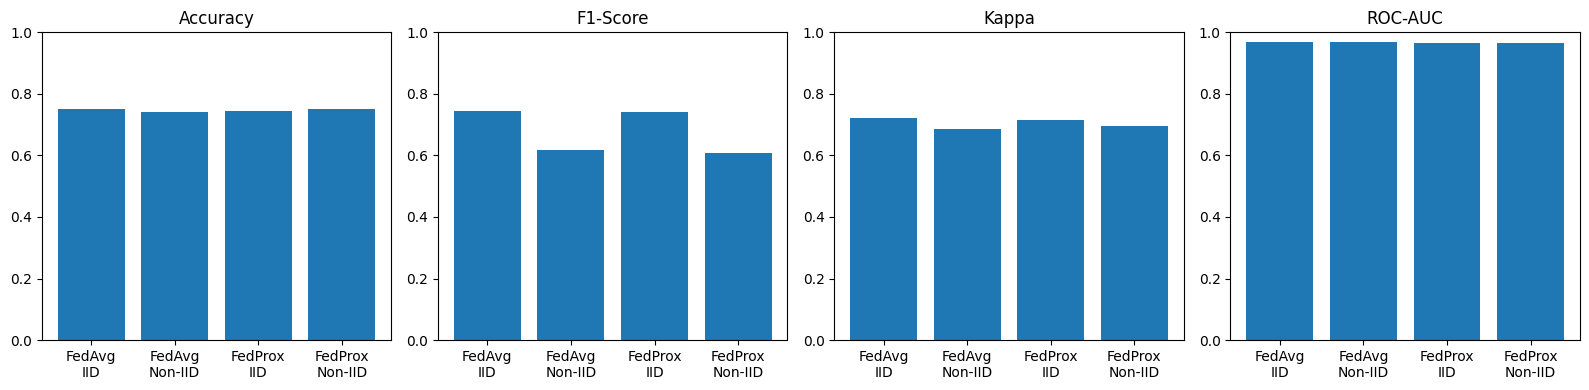

In [3]:
def get_final_metrics(result_dict):
    return {
        'accuracy': result_dict['accuracy'][-1],
        'f1_score': result_dict['f1_score'][-1],
        'kappa': result_dict['kappa'][-1],
        'roc_auc': result_dict['roc_auc'][-1]
    }

baseline_metrics = {
    'FedAvg IID': get_final_metrics(results['fedavg_iid_0']),
    'FedAvg Non-IID': get_final_metrics(results['fedavg_noniid_0']),
    'FedProx IID': get_final_metrics(results['fedprox_iid_0']),
    'FedProx Non-IID': get_final_metrics(results['fedprox_noniid_0'])
}

# Create comparison table
baseline_df = pd.DataFrame(baseline_metrics).T
baseline_df = pd.DataFrame(baseline_metrics).T
print("Baseline Performance:")
print(baseline_df.round(4))

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
metrics = ['accuracy', 'f1_score', 'kappa', 'roc_auc']
titles = ['Accuracy', 'F1-Score', 'Kappa', 'ROC-AUC']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    data = [baseline_metrics[exp][metric] for exp in baseline_metrics.keys()]
    axes[idx].bar(range(len(data)), data)
    axes[idx].set_xticks(range(len(data)))
    axes[idx].set_xticklabels(['FedAvg\nIID', 'FedAvg\nNon-IID', 'FedProx\nIID', 'FedProx\nNon-IID'])
    axes[idx].set_title(title)
    axes[idx].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('baseline_comparison.png', dpi=300)
plt.show()

## FedAvg with Attacks - IID Data

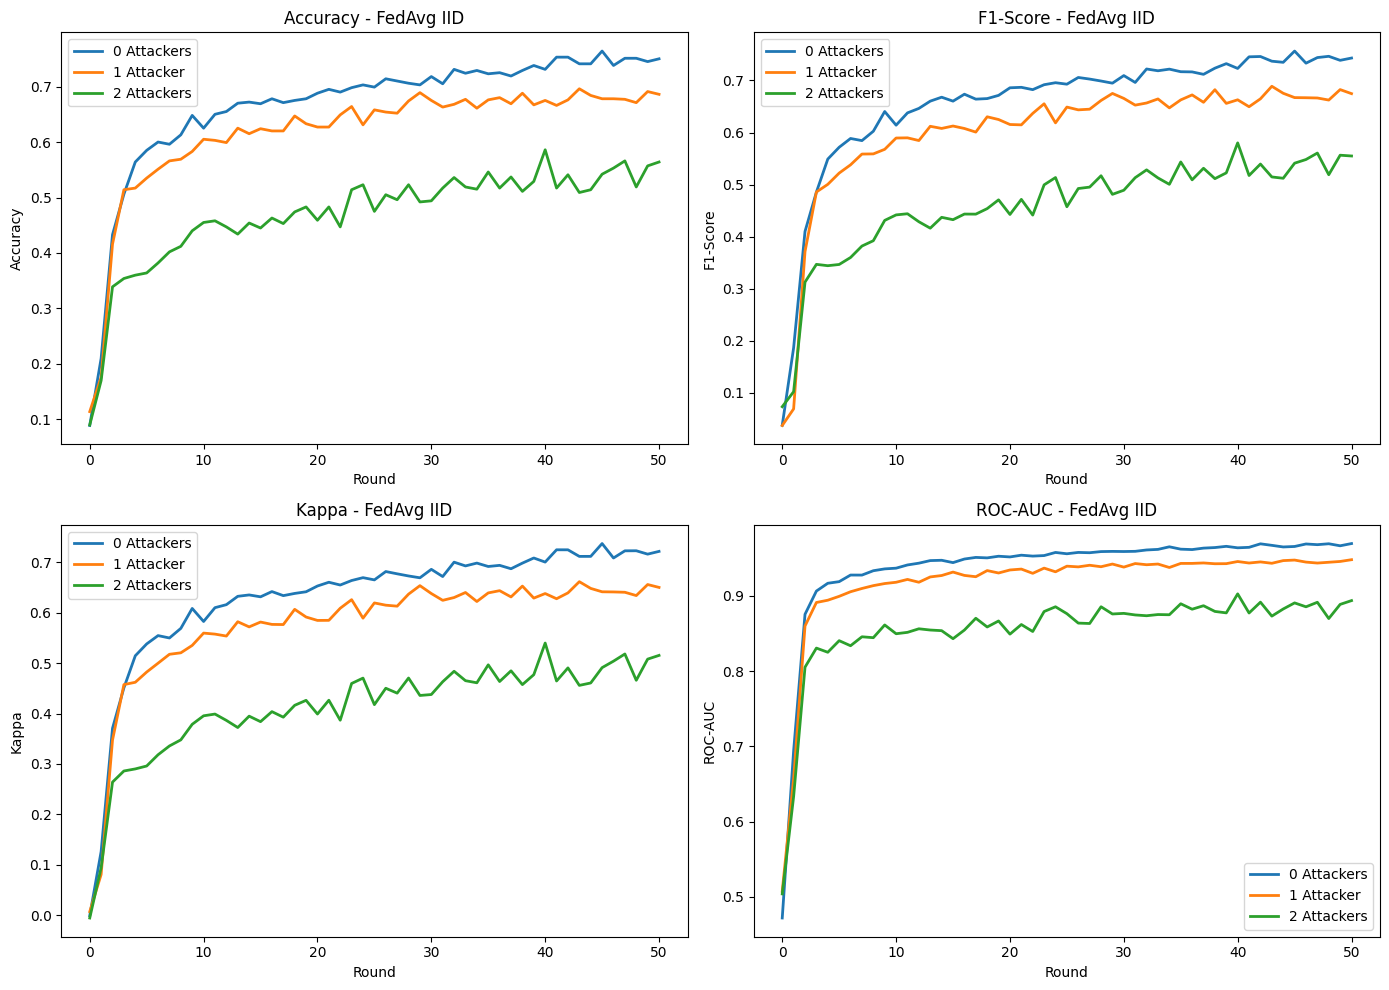

FedAvg IID Final Metrics:
       accuracy  f1_score  kappa  roc_auc
0 Att     0.750     0.743  0.722    0.969
1 Att     0.686     0.675  0.650    0.948
2 Att     0.564     0.555  0.515    0.893


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['accuracy', 'f1_score', 'kappa', 'roc_auc']
titles = ['Accuracy', 'F1-Score', 'Kappa', 'ROC-AUC']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(results['fedavg_iid_0'][metric], label='0 Attackers', linewidth=2)
    ax.plot(results['fedavg_iid_1'][metric], label='1 Attacker', linewidth=2)
    ax.plot(results['fedavg_iid_2'][metric], label='2 Attackers', linewidth=2)
    
    ax.set_xlabel('Round')
    ax.set_ylabel(title)
    ax.set_title(f'{title} - FedAvg IID')
    ax.legend()

plt.tight_layout()
plt.savefig('fedavg_iid_attacks.png', dpi=300)
plt.show()

print("FedAvg IID Final Metrics:")
iid_comparison = pd.DataFrame({
    '0 Att': get_final_metrics(results['fedavg_iid_0']),
    '1 Att': get_final_metrics(results['fedavg_iid_1']),
    '2 Att': get_final_metrics(results['fedavg_iid_2'])
}).T
print(iid_comparison.round(3))

## FedAvg with Attacks - Non-IID Data

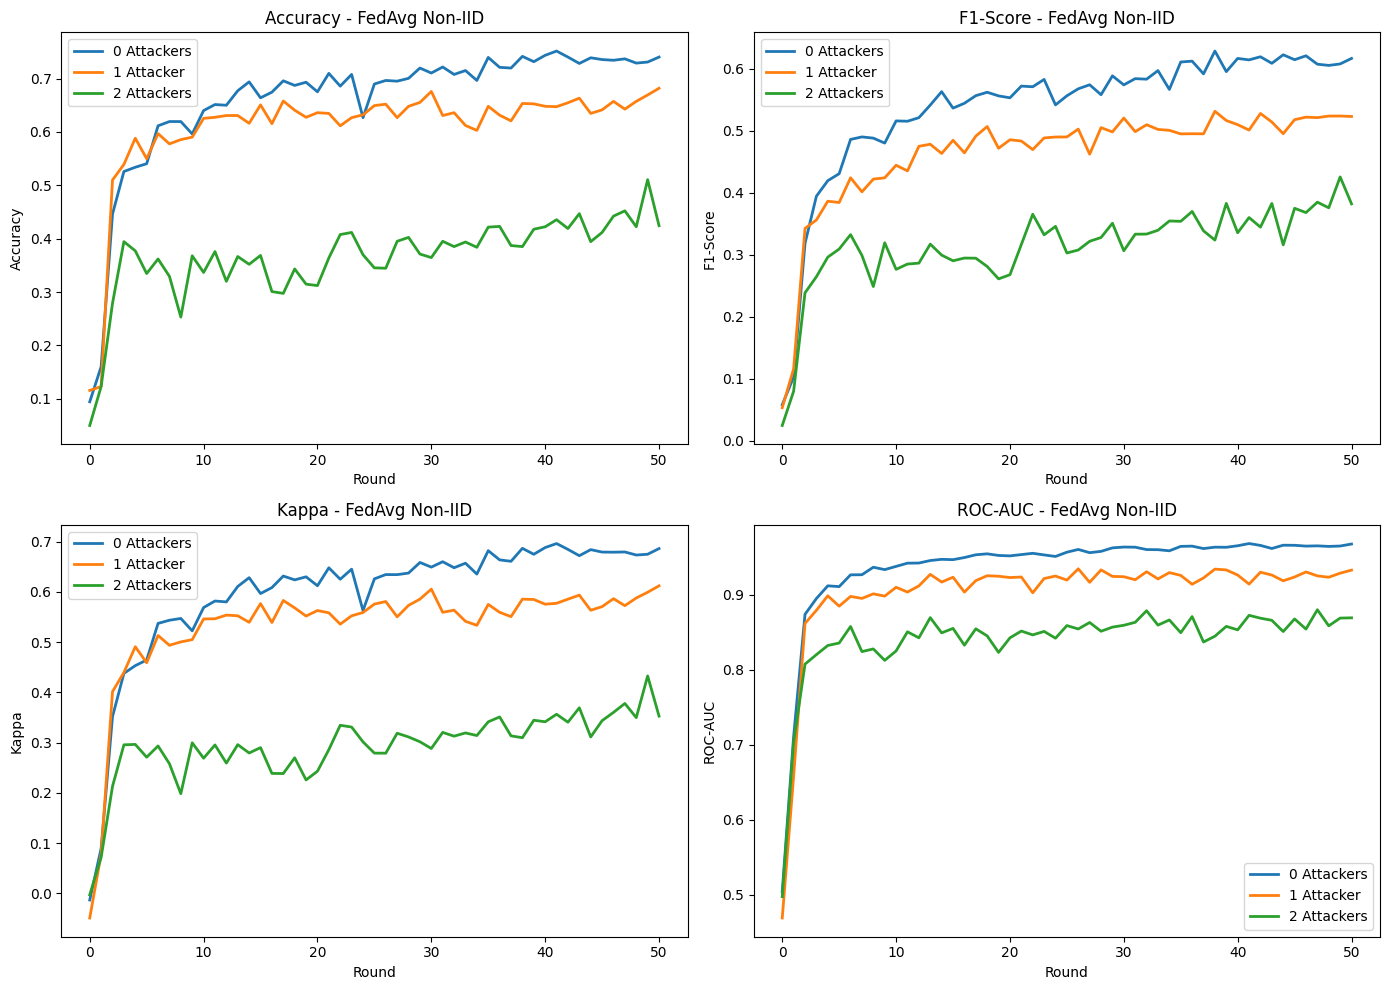

FedAvg Non-IID Final Metrics:
       accuracy  f1_score  kappa  roc_auc
0 Att     0.740     0.617  0.686    0.968
1 Att     0.682     0.523  0.612    0.933
2 Att     0.424     0.382  0.353    0.869


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(results['fedavg_noniid_0'][metric], label='0 Attackers', linewidth=2)
    ax.plot(results['fedavg_noniid_1'][metric], label='1 Attacker', linewidth=2)
    ax.plot(results['fedavg_noniid_2'][metric], label='2 Attackers', linewidth=2)
    
    ax.set_xlabel('Round')
    ax.set_ylabel(title)
    ax.set_title(f'{title} - FedAvg Non-IID')
    ax.legend()

plt.tight_layout()
plt.savefig('fedavg_noniid_attacks.png', dpi=300)
plt.show()

print("FedAvg Non-IID Final Metrics:")
noniid_comparison = pd.DataFrame({
    '0 Att': get_final_metrics(results['fedavg_noniid_0']),
    '1 Att': get_final_metrics(results['fedavg_noniid_1']),
    '2 Att': get_final_metrics(results['fedavg_noniid_2'])
}).T
print(noniid_comparison.round(3))

## IID vs Non-IID Comparison

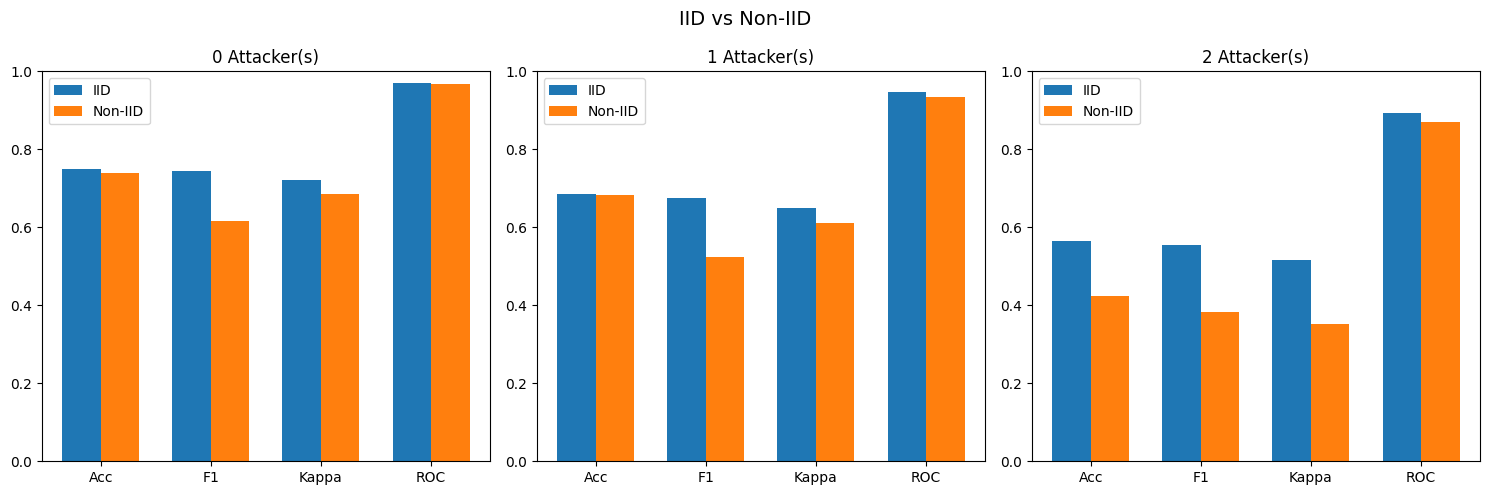

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, num_attackers in enumerate([0, 1, 2]):
    iid_m = get_final_metrics(results[f'fedavg_iid_{num_attackers}'])
    noniid_m = get_final_metrics(results[f'fedavg_noniid_{num_attackers}'])
    
    x = np.arange(4)
    width = 0.35
    
    iid_vals = [iid_m[m] for m in metrics]
    noniid_vals = [noniid_m[m] for m in metrics]
    
    axes[idx].bar(x - width/2, iid_vals, width, label='IID')
    axes[idx].bar(x + width/2, noniid_vals, width, label='Non-IID')
    
    axes[idx].set_title(f'{num_attackers} Attacker(s)')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(['Acc', 'F1', 'Kappa', 'ROC'])
    axes[idx].legend()
    axes[idx].set_ylim([0, 1])

plt.suptitle('IID vs Non-IID', fontsize=14)
plt.tight_layout()
plt.savefig('fedavg_iid_vs_noniid.png', dpi=300)
plt.show()

## FedProx with Attacks

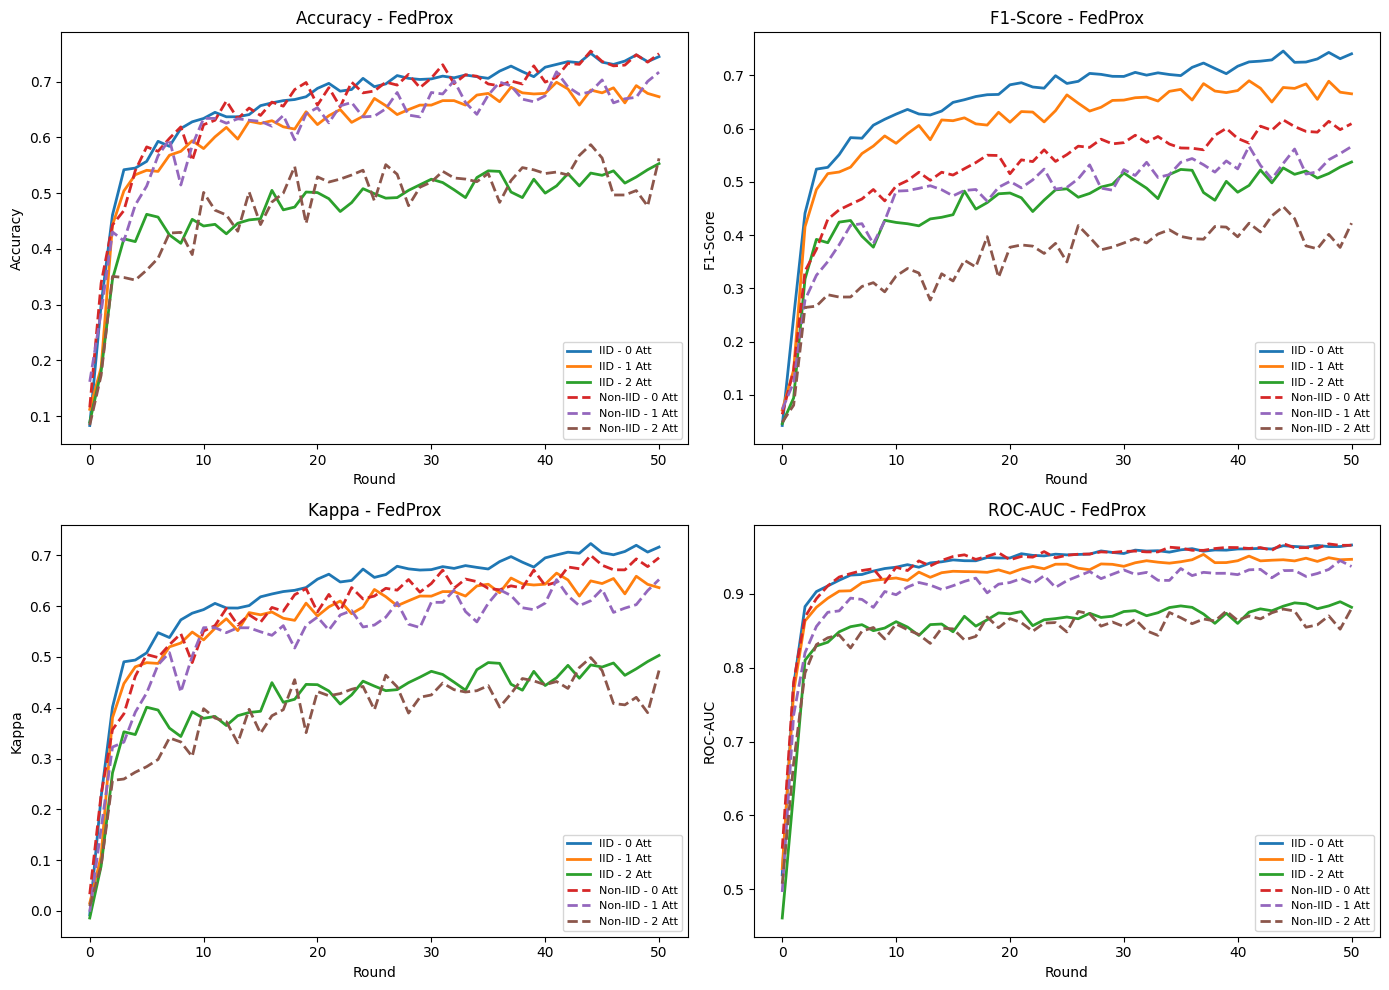

FedProx Final Metrics:
          accuracy  f1_score  kappa  roc_auc
IID-0        0.745     0.741  0.716    0.966
IID-1        0.673     0.666  0.636    0.947
IID-2        0.553     0.537  0.503    0.882
NonIID-0     0.750     0.609  0.695    0.966
NonIID-1     0.717     0.567  0.652    0.937
NonIID-2     0.562     0.423  0.473    0.880


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # IID
    ax.plot(results['fedprox_iid_0'][metric], label='IID - 0 Att', linewidth=2, linestyle='-')
    ax.plot(results['fedprox_iid_1'][metric], label='IID - 1 Att', linewidth=2, linestyle='-')
    ax.plot(results['fedprox_iid_2'][metric], label='IID - 2 Att', linewidth=2, linestyle='-')
    
    # Non-IID
    ax.plot(results['fedprox_noniid_0'][metric], label='Non-IID - 0 Att', linewidth=2, linestyle='--')
    ax.plot(results['fedprox_noniid_1'][metric], label='Non-IID - 1 Att', linewidth=2, linestyle='--')
    ax.plot(results['fedprox_noniid_2'][metric], label='Non-IID - 2 Att', linewidth=2, linestyle='--')
    
    ax.set_xlabel('Round')
    ax.set_ylabel(title)
    ax.set_title(f'{title} - FedProx')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig('fedprox_all_scenarios.png', dpi=300)
plt.show()

print("FedProx Final Metrics:")
fedprox_comp = pd.DataFrame({
    'IID-0': get_final_metrics(results['fedprox_iid_0']),
    'IID-1': get_final_metrics(results['fedprox_iid_1']),
    'IID-2': get_final_metrics(results['fedprox_iid_2']),
    'NonIID-0': get_final_metrics(results['fedprox_noniid_0']),
    'NonIID-1': get_final_metrics(results['fedprox_noniid_1']),
    'NonIID-2': get_final_metrics(results['fedprox_noniid_2'])
}).T
print(fedprox_comp.round(3))

### FedAvg vs FedProx Comparison

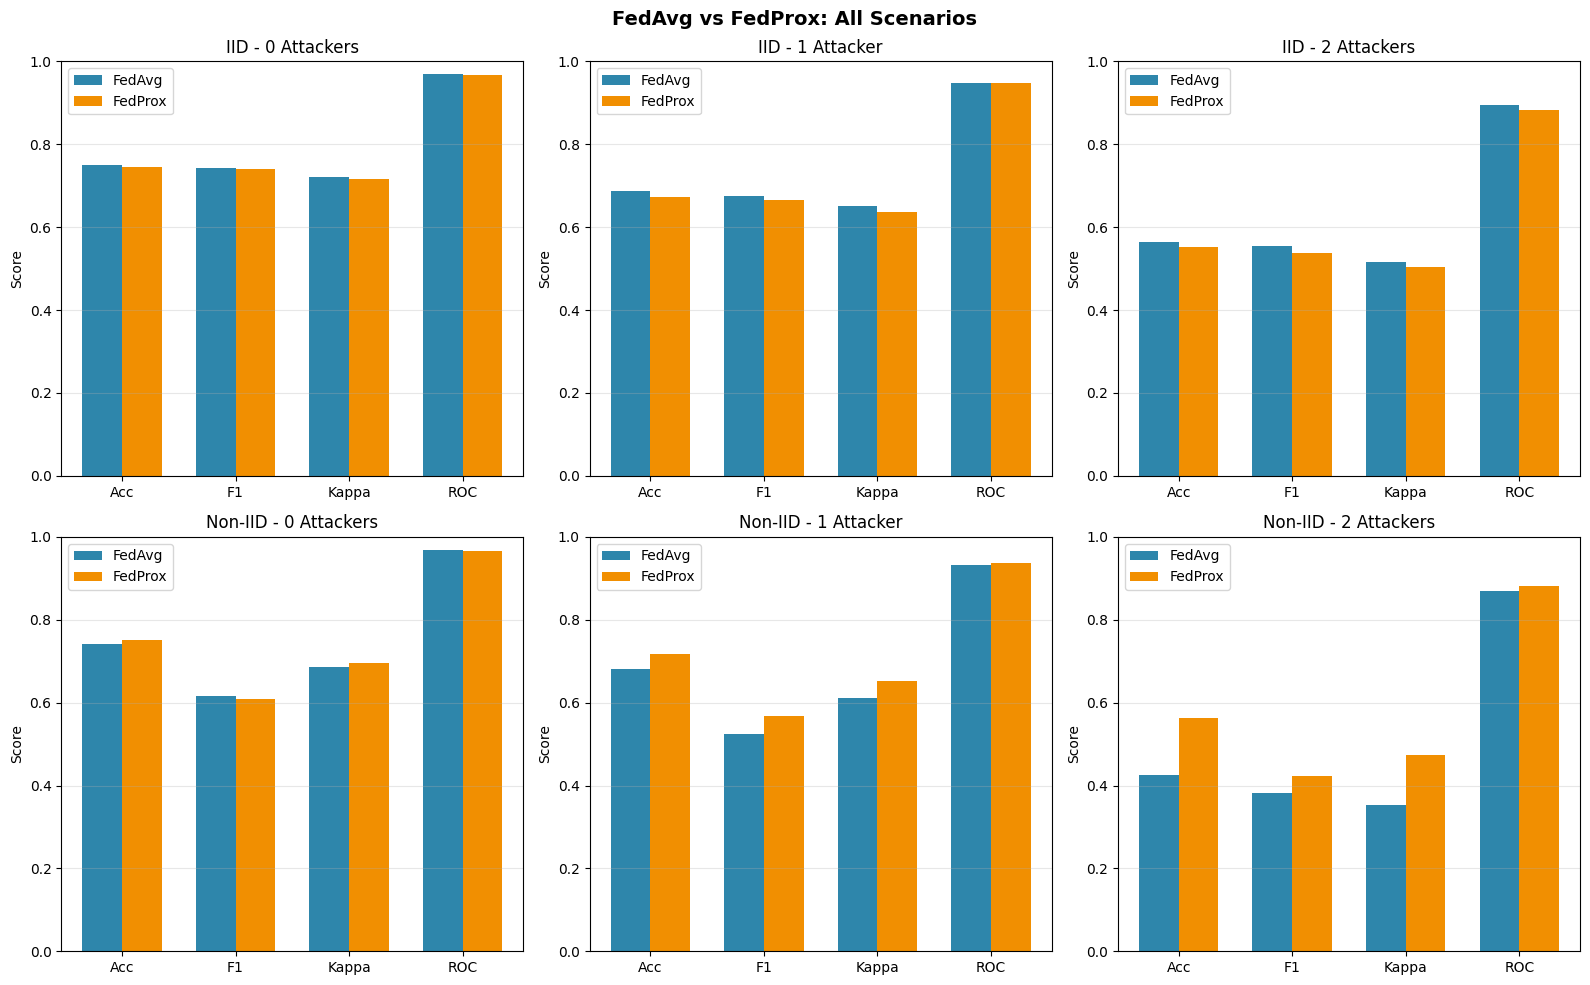

In [8]:
# Compare FedAvg vs FedProx under attacks
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

scenarios = [
    ('iid_0', 'IID - 0 Attackers'),
    ('iid_1', 'IID - 1 Attacker'),
    ('iid_2', 'IID - 2 Attackers'),
    ('noniid_0', 'Non-IID - 0 Attackers'),
    ('noniid_1', 'Non-IID - 1 Attacker'),
    ('noniid_2', 'Non-IID - 2 Attackers')
]

for idx, (scenario, title) in enumerate(scenarios):
    ax = axes[idx // 3, idx % 3]
    
    fedavg_metrics = get_final_metrics(results[f'fedavg_{scenario}'])
    fedprox_metrics = get_final_metrics(results[f'fedprox_{scenario}'])
    
    x = np.arange(len(metrics))
    width = 0.35
    
    fedavg_vals = [fedavg_metrics[m] for m in metrics]
    fedprox_vals = [fedprox_metrics[m] for m in metrics]
    
    ax.bar(x - width/2, fedavg_vals, width, label='FedAvg', color='#2E86AB')
    ax.bar(x + width/2, fedprox_vals, width, label='FedProx', color='#F18F01')
    
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(['Acc', 'F1', 'Kappa', 'ROC'])
    ax.legend()
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('FedAvg vs FedProx: All Scenarios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('fedavg_vs_fedprox_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Part 2.3: Defense Mechanism - Loss-Based Anomaly Detection

### Defense Strategy
The defense mechanism filters out clients with losses above the 75th percentile during aggregation.

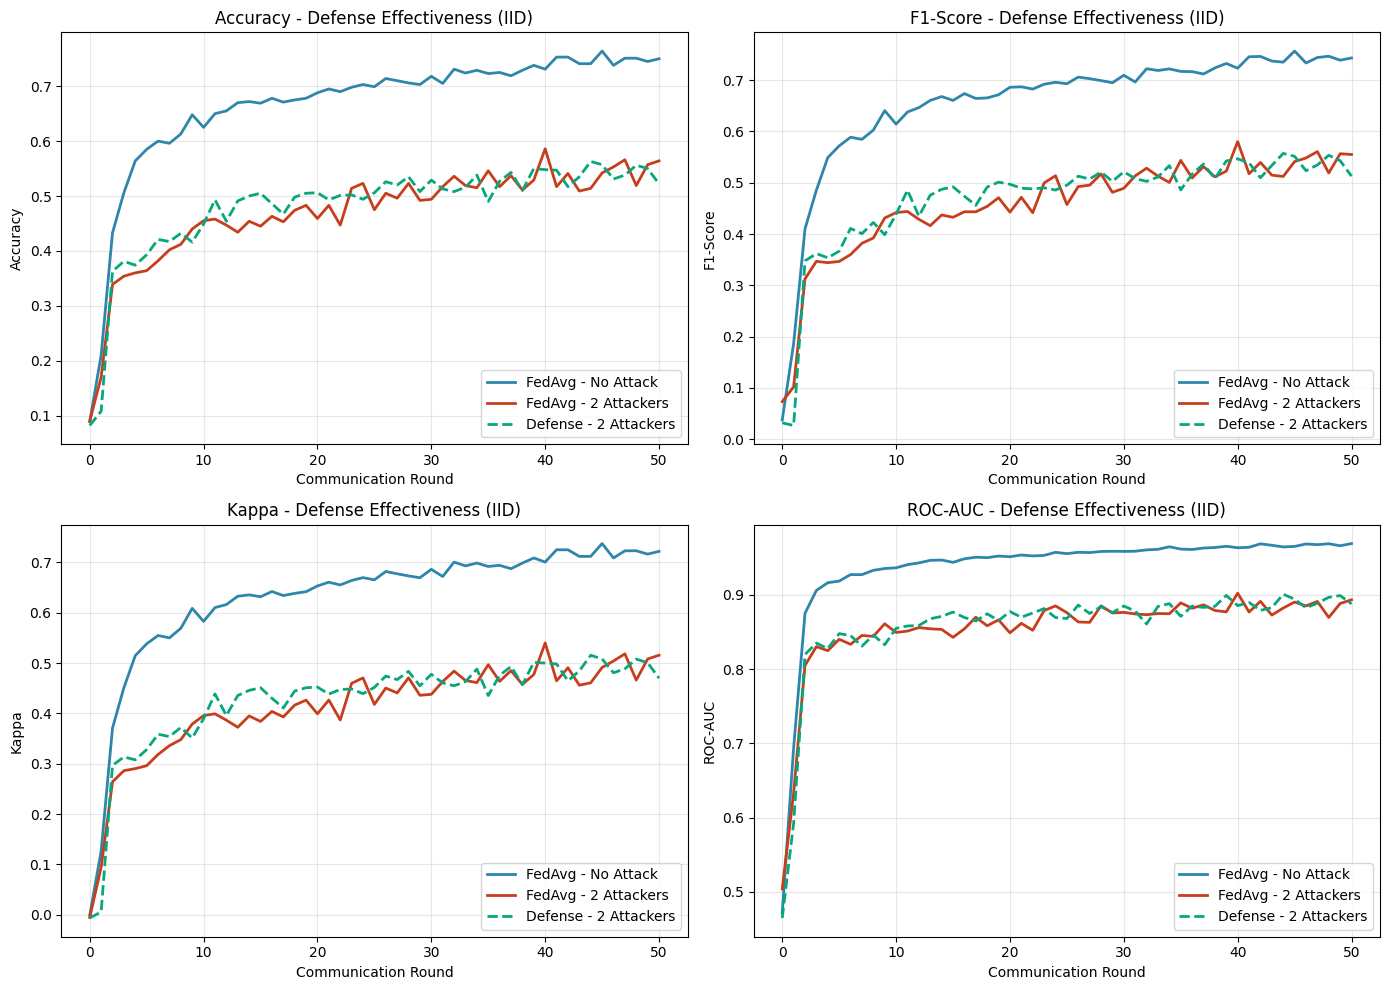


=== Defense Effectiveness: IID Data ===
                  accuracy  f1_score   kappa  roc_auc
Baseline (0 Att)     0.750    0.7431  0.7218   0.9692
FedAvg (2 Att)       0.564    0.5550  0.5155   0.8935
Defense (2 Att)      0.522    0.5128  0.4698   0.8879

=== Defense Recovery Rate ===
accuracy: -22.58% recovery
f1_score: -22.44% recovery
kappa: -22.11% recovery
roc_auc: -7.34% recovery


In [9]:
# Plot Defense effectiveness - IID
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Baseline (no attack)
    ax.plot(results['fedavg_iid_0'][metric], label='FedAvg - No Attack', 
            color='#2E86AB', linewidth=2, linestyle='-')
    
    # FedAvg with 2 attackers (worst case)
    ax.plot(results['fedavg_iid_2'][metric], label='FedAvg - 2 Attackers', 
            color='#C73E1D', linewidth=2, linestyle='-')
    
    # Defense with 2 attackers
    ax.plot(results['defense_iid_2'][metric], label='Defense - 2 Attackers', 
            color='#06A77D', linewidth=2, linestyle='--')
    
    ax.set_xlabel('Communication Round')
    ax.set_ylabel(title)
    ax.set_title(f'{title} - Defense Effectiveness (IID)')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('defense_iid_effectiveness.png', dpi=300, bbox_inches='tight')
plt.show()

# Print comparison
print("\n=== Defense Effectiveness: IID Data ===")
defense_iid_comp = pd.DataFrame({
    'Baseline (0 Att)': get_final_metrics(results['fedavg_iid_0']),
    'FedAvg (2 Att)': get_final_metrics(results['fedavg_iid_2']),
    'Defense (2 Att)': get_final_metrics(results['defense_iid_2'])
}).T
print(defense_iid_comp.round(4))

# Calculate recovery percentage
print("\n=== Defense Recovery Rate ===")
baseline = get_final_metrics(results['fedavg_iid_0'])
attacked = get_final_metrics(results['fedavg_iid_2'])
defended = get_final_metrics(results['defense_iid_2'])

for metric in metrics:
    total_degradation = baseline[metric] - attacked[metric]
    defense_improvement = defended[metric] - attacked[metric]
    recovery_rate = (defense_improvement / total_degradation * 100) if total_degradation > 0 else 0
    print(f"{metric}: {recovery_rate:.2f}% recovery")

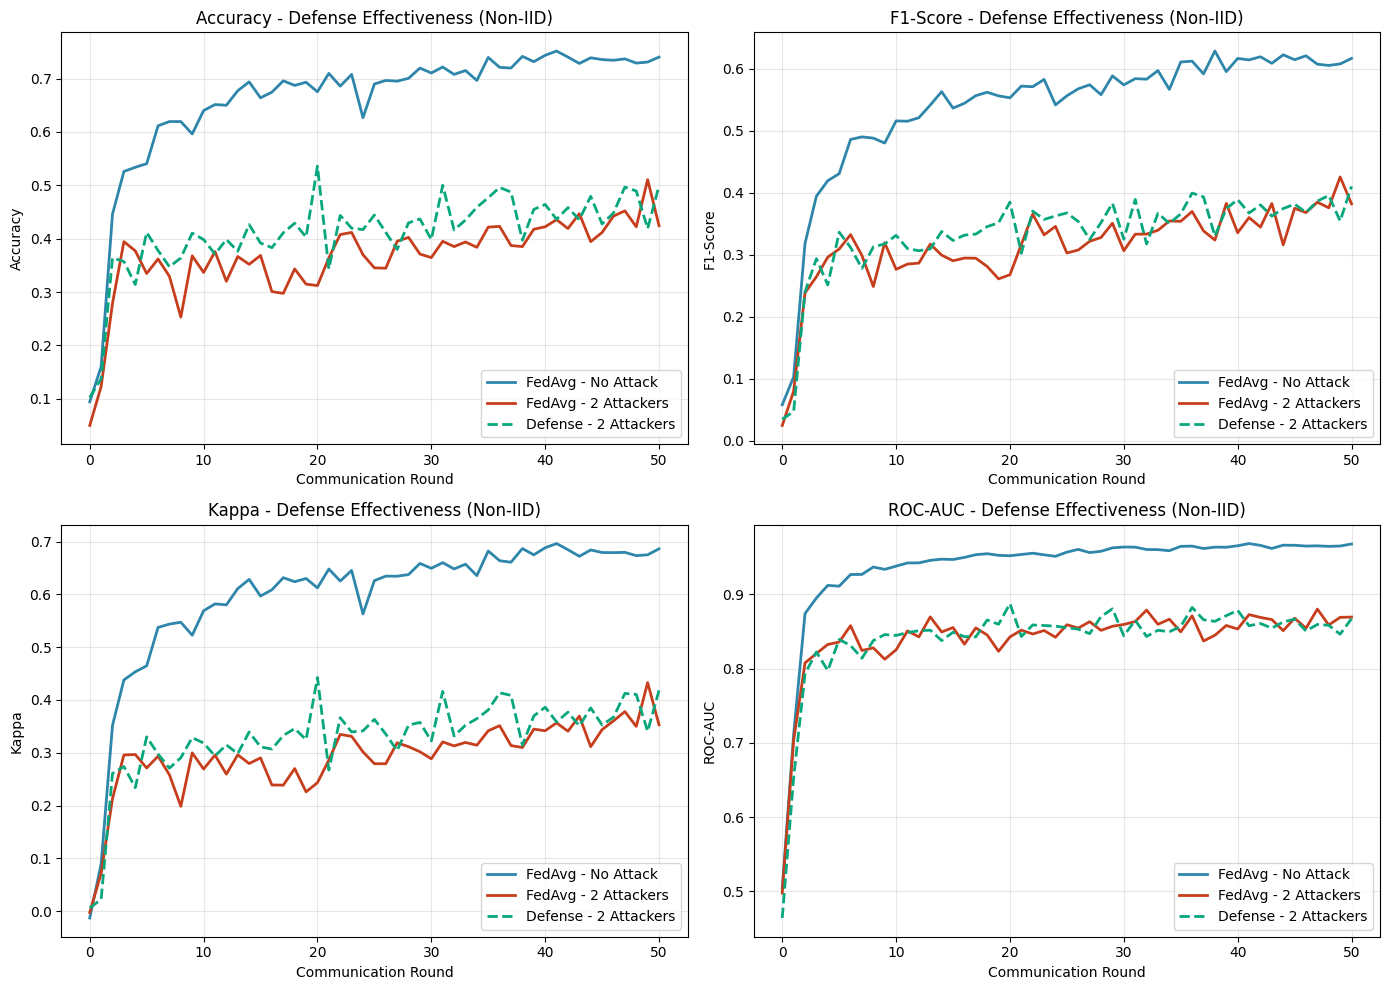


=== Defense Effectiveness: Non-IID Data ===
                  accuracy  f1_score   kappa  roc_auc
Baseline (0 Att)    0.7404    0.6167  0.6862   0.9678
FedAvg (2 Att)      0.4243    0.3823  0.3528   0.8694
Defense (2 Att)     0.4993    0.4105  0.4181   0.8673

=== Defense Recovery Rate ===
accuracy: 23.74% recovery
f1_score: 12.06% recovery
kappa: 19.57% recovery
roc_auc: -2.14% recovery


In [10]:
# Plot Defense effectiveness - Non-IID
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(results['fedavg_noniid_0'][metric], label='FedAvg - No Attack', 
            color='#2E86AB', linewidth=2, linestyle='-')
    ax.plot(results['fedavg_noniid_2'][metric], label='FedAvg - 2 Attackers', 
            color='#C73E1D', linewidth=2, linestyle='-')
    ax.plot(results['defense_noniid_2'][metric], label='Defense - 2 Attackers', 
            color='#06A77D', linewidth=2, linestyle='--')
    
    ax.set_xlabel('Communication Round')
    ax.set_ylabel(title)
    ax.set_title(f'{title} - Defense Effectiveness (Non-IID)')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('defense_noniid_effectiveness.png', dpi=300, bbox_inches='tight')
plt.show()

# Print comparison
print("\n=== Defense Effectiveness: Non-IID Data ===")
defense_noniid_comp = pd.DataFrame({
    'Baseline (0 Att)': get_final_metrics(results['fedavg_noniid_0']),
    'FedAvg (2 Att)': get_final_metrics(results['fedavg_noniid_2']),
    'Defense (2 Att)': get_final_metrics(results['defense_noniid_2'])
}).T
print(defense_noniid_comp.round(4))

# Calculate recovery percentage
print("\n=== Defense Recovery Rate ===")
baseline = get_final_metrics(results['fedavg_noniid_0'])
attacked = get_final_metrics(results['fedavg_noniid_2'])
defended = get_final_metrics(results['defense_noniid_2'])

for metric in metrics:
    total_degradation = baseline[metric] - attacked[metric]
    defense_improvement = defended[metric] - attacked[metric]
    recovery_rate = (defense_improvement / total_degradation * 100) if total_degradation > 0 else 0
    print(f"{metric}: {recovery_rate:.2f}% recovery")

### Comprehensive Defense Analysis

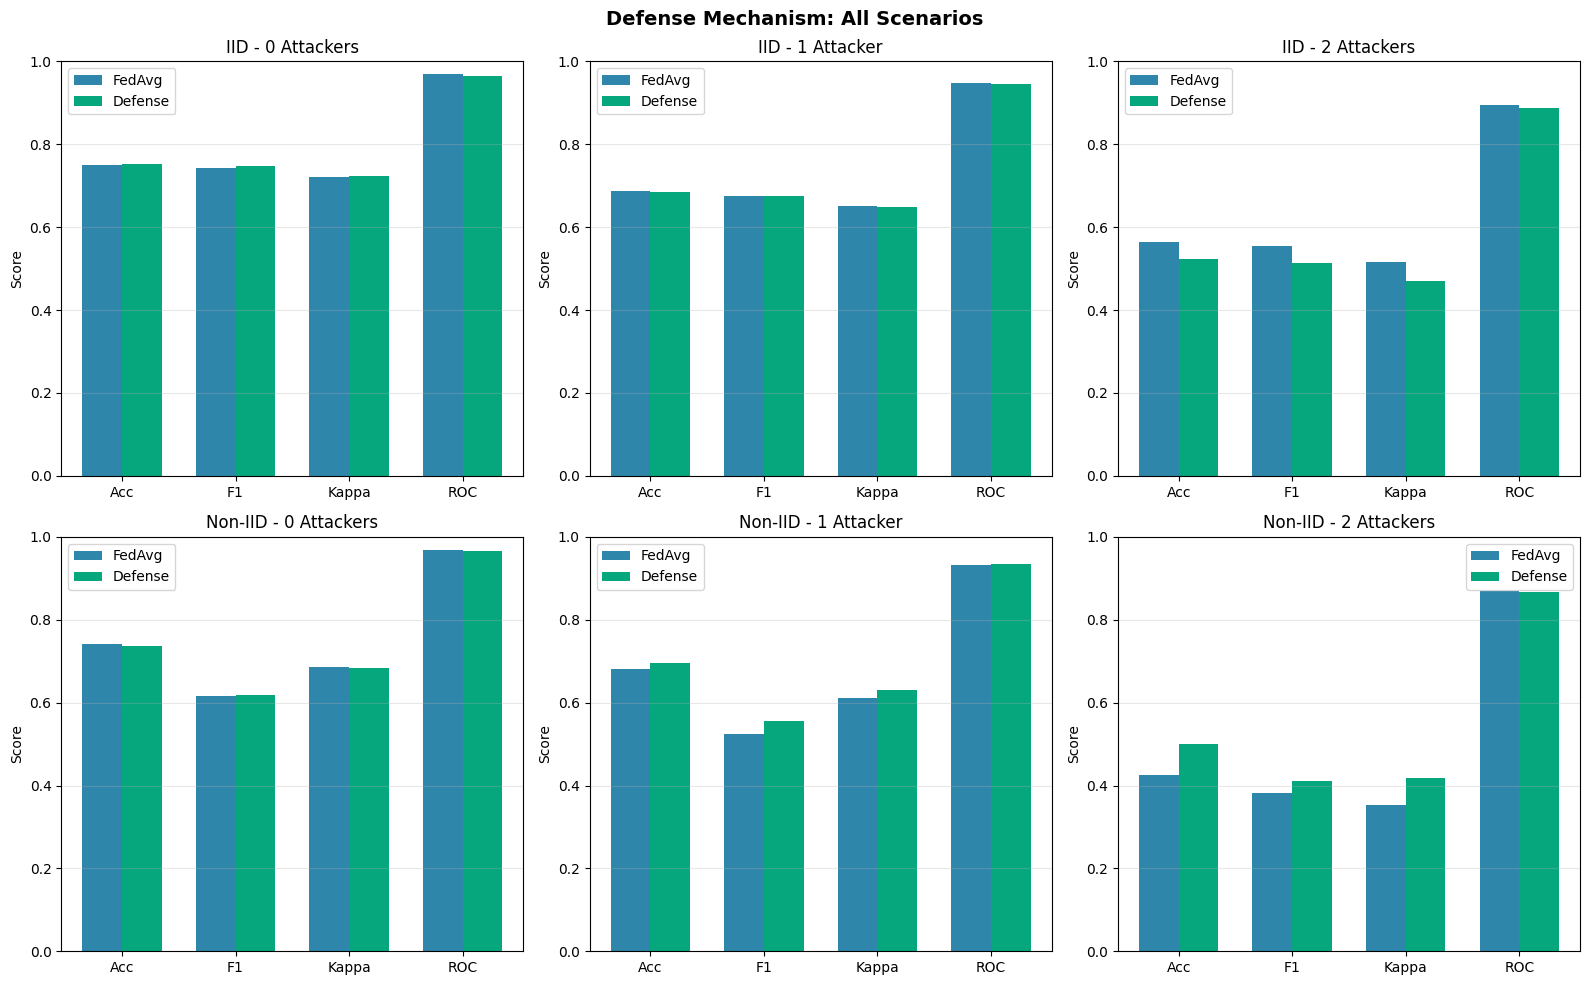


=== Defense vs FedAvg: All Scenarios ===
                   accuracy  f1_score   kappa  roc_auc
FedAvg IID-0         0.7500    0.7431  0.7218   0.9692
Defense IID-0        0.7520    0.7467  0.7239   0.9643
FedAvg IID-1         0.6860    0.6747  0.6503   0.9478
Defense IID-1        0.6850    0.6761  0.6490   0.9460
FedAvg IID-2         0.5640    0.5550  0.5155   0.8935
Defense IID-2        0.5220    0.5128  0.4698   0.8879
FedAvg Non-IID-0     0.7404    0.6167  0.6862   0.9678
Defense Non-IID-0    0.7377    0.6191  0.6836   0.9655
FedAvg Non-IID-1     0.6819    0.5231  0.6121   0.9330
Defense Non-IID-1    0.6959    0.5554  0.6307   0.9335
FedAvg Non-IID-2     0.4243    0.3823  0.3528   0.8694
Defense Non-IID-2    0.4993    0.4105  0.4181   0.8673


In [11]:
# Create comprehensive defense comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

defense_scenarios = [
    ('iid_0', 'IID - 0 Attackers'),
    ('iid_1', 'IID - 1 Attacker'),
    ('iid_2', 'IID - 2 Attackers'),
    ('noniid_0', 'Non-IID - 0 Attackers'),
    ('noniid_1', 'Non-IID - 1 Attacker'),
    ('noniid_2', 'Non-IID - 2 Attackers')
]

for idx, (scenario, title) in enumerate(defense_scenarios):
    ax = axes[idx // 3, idx % 3]
    
    fedavg_metrics = get_final_metrics(results[f'fedavg_{scenario}'])
    defense_metrics = get_final_metrics(results[f'defense_{scenario}'])
    
    x = np.arange(len(metrics))
    width = 0.35
    
    fedavg_vals = [fedavg_metrics[m] for m in metrics]
    defense_vals = [defense_metrics[m] for m in metrics]
    
    ax.bar(x - width/2, fedavg_vals, width, label='FedAvg', color='#2E86AB')
    ax.bar(x + width/2, defense_vals, width, label='Defense', color='#06A77D')
    
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(['Acc', 'F1', 'Kappa', 'ROC'])
    ax.legend()
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Defense Mechanism: All Scenarios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('defense_all_scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

# Print comprehensive defense metrics
print("\n=== Defense vs FedAvg: All Scenarios ===")
all_defense_comp = pd.DataFrame({
    'FedAvg IID-0': get_final_metrics(results['fedavg_iid_0']),
    'Defense IID-0': get_final_metrics(results['defense_iid_0']),
    'FedAvg IID-1': get_final_metrics(results['fedavg_iid_1']),
    'Defense IID-1': get_final_metrics(results['defense_iid_1']),
    'FedAvg IID-2': get_final_metrics(results['fedavg_iid_2']),
    'Defense IID-2': get_final_metrics(results['defense_iid_2']),
    'FedAvg Non-IID-0': get_final_metrics(results['fedavg_noniid_0']),
    'Defense Non-IID-0': get_final_metrics(results['defense_noniid_0']),
    'FedAvg Non-IID-1': get_final_metrics(results['fedavg_noniid_1']),
    'Defense Non-IID-1': get_final_metrics(results['defense_noniid_1']),
    'FedAvg Non-IID-2': get_final_metrics(results['fedavg_noniid_2']),
    'Defense Non-IID-2': get_final_metrics(results['defense_noniid_2'])
}).T
print(all_defense_comp.round(4))

## Summary

In [ ]:
print("="*60)
print("SUMMARY")
print("="*60)

print("\n1. BASELINE (No Attacks)")
print("-" * 60)
for strategy in ['FedAvg', 'FedProx']:
    for dist in ['IID', 'Non-IID']:
        key = f'{strategy.lower()}_{"iid" if dist == "IID" else "noniid"}_0'
        m = get_final_metrics(results[key])
        print(f"{strategy} {dist}: Acc={m['accuracy']:.3f}, F1={m['f1_score']:.3f}")

print("\n2. ATTACK IMPACT (2 Attackers)")
print("-" * 60)
for strategy in ['fedavg', 'fedprox']:
    for dist, dist_name in [('iid', 'IID'), ('noniid', 'Non-IID')]:
        baseline = get_final_metrics(results[f'{strategy}_{dist}_0'])
        attacked = get_final_metrics(results[f'{strategy}_{dist}_2'])
        
        acc_deg = (baseline['accuracy'] - attacked['accuracy']) / baseline['accuracy'] * 100
        print(f"{strategy.upper()} {dist_name}: {acc_deg:.1f}% accuracy drop")

print("\n3. DEFENSE EFFECTIVENESS")
print("-" * 60)
for dist, dist_name in [('iid', 'IID'), ('noniid', 'Non-IID')]:
    baseline = get_final_metrics(results[f'fedavg_{dist}_0'])
    attacked = get_final_metrics(results[f'fedavg_{dist}_2'])
    defended = get_final_metrics(results[f'defense_{dist}_2'])
    
    total_loss = baseline['accuracy'] - attacked['accuracy']
    recovery = defended['accuracy'] - attacked['accuracy']
    recovery_pct = (recovery / total_loss * 100) if total_loss > 0 else 0
    print(f"{dist_name}: {recovery_pct:.1f}% recovery")

print("\n" + "="*60)

FEDERATED LEARNING EXPERIMENT SUMMARY

1. BASELINE PERFORMANCE (No Attacks)
----------------------------------------------------------------------
FedAvg IID:
  Accuracy: 0.7500 | F1: 0.7431 | Kappa: 0.7218 | ROC-AUC: 0.9692
FedAvg Non-IID:
  Accuracy: 0.7404 | F1: 0.6167 | Kappa: 0.6862 | ROC-AUC: 0.9678
FedProx IID:
  Accuracy: 0.7450 | F1: 0.7407 | Kappa: 0.7161 | ROC-AUC: 0.9662
FedProx Non-IID:
  Accuracy: 0.7503 | F1: 0.6094 | Kappa: 0.6951 | ROC-AUC: 0.9659

2. IMPACT OF ATTACKS (2 Attackers - Worst Case)
----------------------------------------------------------------------

FEDAVG IID:
  accuracy: 24.80% degradation
  f1_score: 25.32% degradation
  kappa: 28.59% degradation
  roc_auc: 7.81% degradation

FEDAVG Non-IID:
  accuracy: 42.69% degradation
  f1_score: 38.02% degradation
  kappa: 48.58% degradation
  roc_auc: 10.17% degradation

FEDPROX IID:
  accuracy: 25.77% degradation
  f1_score: 27.43% degradation
  kappa: 29.77% degradation
  roc_auc: 8.72% degradation

FEDPROX 